In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
#.\venv\Scripts\activate

In [3]:
data2 = pd.read_csv("C:\WWI2021\Semester 6\Machine Learning\data\BTC-USD.csv")
data2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3517,2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992
3518,2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805
3519,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697
3520,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982


In [4]:
data2['RSI']=ta.rsi(data2.Close, length=15)
data2['EMA20']=ta.ema(data2.Close, length=20)
data2['EMA100']=ta.ema(data2.Close, length=100)
data2['EMA150']=ta.ema(data2.Close, length=150)


In [5]:
data2['Target'] = data2['Adj Close']-data2.Open
data2['Target'] = data2['Target'].shift(-1)

data2['TargetClass'] = [1 if data2.Target[i]>0 else 0 for i in range(len(data2))]
data2

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA20,EMA100,EMA150,Target,TargetClass
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,-32.419983,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN,-29.307007,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN,14.230988,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN,-9.263977,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN,3.052002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,2024-05-04,62891.031250,64494.957031,62599.351563,63891.472656,63891.472656,20620477992,49.568973,63492.451518,60023.934751,55814.205645,138.679688,1
3518,2024-05-05,63892.453125,64610.890625,62955.304688,64031.132813,64031.132813,18296164805,49.895138,63543.754499,60103.285208,55923.039118,-876.363281,0
3519,2024-05-06,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697,47.832307,63507.392091,60163.852812,56018.918722,-827.945313,0
3520,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982,45.897570,63395.718216,60206.842190,56102.572996,0.355469,1


In [6]:
data2_clean = data2
data2_clean.dropna(inplace=True)
data2_clean.reset_index(drop=True, inplace=True)

data2_clean.drop([ 'Open', 'High', 'Low', 'Adj Close', 'Close', 'Target', 'Date', 'Volume'], axis=1, inplace=True)
data2_clean

,RSI,EMA20,EMA100,EMA150,TargetClass
0,50.019072,229.312807,288.640505,327.932773,1
1,58.174526,231.980256,288.020317,326.997518,0
2,49.315763,232.251183,286.966944,325.776690,0
3,48.967016,232.402785,285.914985,324.559025,1
4,52.543343,233.470139,285.077263,323.486853,0
...,...,...,...,...,...
3367,47.271348,63450.449293,59945.802672,55705.785954,1
3368,49.568973,63492.451518,60023.934751,55814.205645,1
3369,49.895138,63543.754499,60103.285208,55923.039118,0
3370,47.832307,63507.392091,60163.852812,56018.918722,0


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df2_scaled = sc.fit_transform(data2_clean)
print(df2_scaled)

[[4.73730553e-01 0.00000000e+00 7.79925300e-04 1.41124086e-03
  1.00000000e+00]
 [5.71810073e-01 3.89258577e-05 7.69582797e-04 1.39449606e-03
  0.00000000e+00]
 [4.65272382e-01 4.28794845e-05 7.52016329e-04 1.37263836e-03
  0.00000000e+00]
 ...
 [4.72240089e-01 9.23942559e-01 9.98273042e-01 9.96785627e-01
  0.00000000e+00]
 [4.47431974e-01 9.23411925e-01 9.99283092e-01 9.98502254e-01
  0.00000000e+00]
 [4.24164341e-01 9.21782277e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]


In [8]:
# backcandles = windowing
backcandles = 10
num_features = 4  # Vier Features: RSI, EMA20, EMA100, EMA150
X = [[] for _ in range(num_features)]

# Generieren des windowed Feature-Sets  
for j in range(num_features):
    for i in range(backcandles, df2_scaled.shape[0]):
        X[j].append(df2_scaled[i-backcandles:i, j])

# Achse verschieben
X = np.moveaxis(X, 0, 2)

# Anpassen von y, um die Länge von X zu entsprechen
yi = df2_scaled[backcandles:, -1]  # Letzte Spalte ist TargetNextClose
y = np.reshape(yi, (len(yi), 1))

# Umwandeln von X in ein Numpy-Array
X = np.array(X)



In [9]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train2, X_test2 = X[:splitlimit], X[splitlimit:]
y_train2, y_test2 = y[:splitlimit], y[splitlimit:]
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)
print(y_train2)

2689
(2689, 10, 4)
(673, 10, 4)
(2689, 1)
(673, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [17]:
import mlflow

mlflow.set_tracking_uri(uri="http://<host>:<port>")


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras import optimizers

# 4 Input-Features
lstm_input = Input(shape=(backcandles, 4), name='lstm_input')

# LSTM Layer
inputs = LSTM(150, name='first_layer')(lstm_input)

# Dense Layer für die Ausgabe mit Sigmoid-Aktivierungsfunktion
inputs = Dense(1, activation='sigmoid', name='dense_layer')(inputs)

# Erstellen des Modells
model = Model(inputs=lstm_input, outputs=inputs)

# Optimizer
adam = optimizers.Adam()

# Kompilieren des Modells
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Training des Modells
model.fit(x=X_train2, y=y_train2, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)


Epoch 1/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5135 - loss: 0.6929 - val_accuracy: 0.4349 - val_loss: 0.6964
Epoch 2/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 0.6894 - val_accuracy: 0.4572 - val_loss: 0.6956
Epoch 3/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5359 - loss: 0.6900 - val_accuracy: 0.4424 - val_loss: 0.6960
Epoch 4/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 0.6854 - val_accuracy: 0.4610 - val_loss: 0.6950
Epoch 5/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 0.6871 - val_accuracy: 0.4387 - val_loss: 0.6958
Epoch 6/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5438 - loss: 0.6878 - val_accuracy: 0.4572 - val_loss: 0.6956
Epoch 7/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5395 - loss: 0.6867 - val_accuracy: 0.5204 - val_loss: 0.6941
Epoch 8/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 0.6877 - val_accuracy: 0.

In [19]:
y_pred2 = model.predict(X_test2)

for i in range(10):
    print(y_pred2[i], y_test2[i])

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[0.48583812] [1.]
[0.48921594] [1.]
[0.4922749] [1.]
[0.49760363] [0.]
[0.5023318] [0.]
[0.5044952] [0.]
[0.50297314] [0.]
[0.49865538] [1.]
[0.49387884] [1.]
[0.49397635] [1.]


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


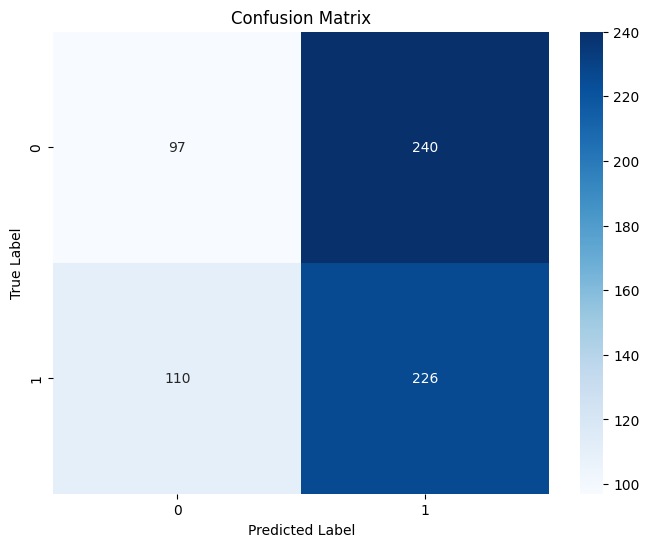

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vorhersagen für den Testdatensatz machen
y_pred = model.predict(X_test2)

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_test2, (y_pred > 0.5).astype(int))

# Konfusionsmatrix anzeigen
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



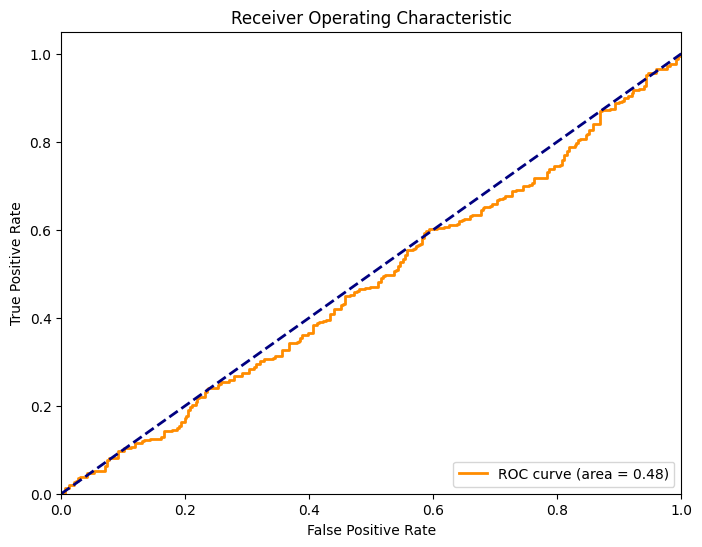

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(y_test2, y_pred)
roc_auc = auc(fpr, tpr)

# ROC-Kurve anzeigen
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


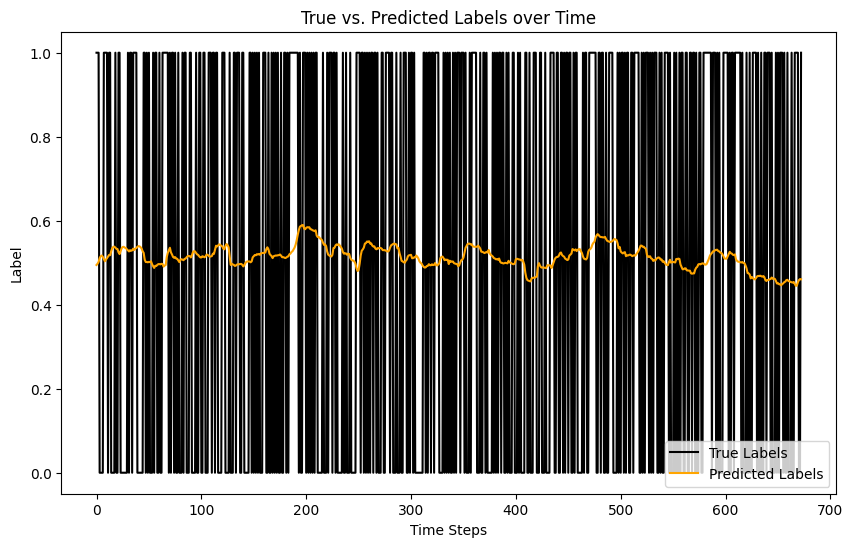

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test2, label='True Labels', color='black')
plt.plot(y_pred, label='Predicted Labels', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Label')
plt.title('True vs. Predicted Labels over Time')
plt.legend()
plt.show()

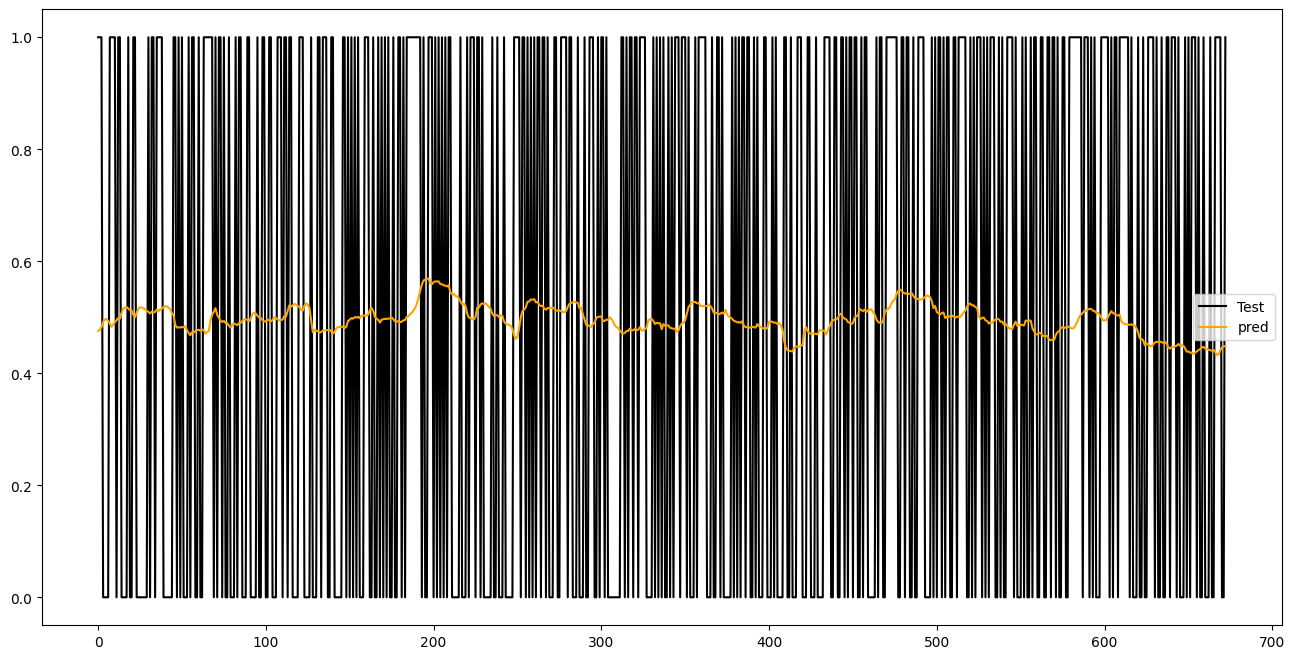

In [13]:
plt.figure(figsize=(16,8))
plt.plot(y_test2, color = 'black', label = 'Test')
plt.plot(y_pred2, color = 'orange', label = 'pred')
plt.legend()
plt.show()